<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 0, 'Median value in $1,000s')

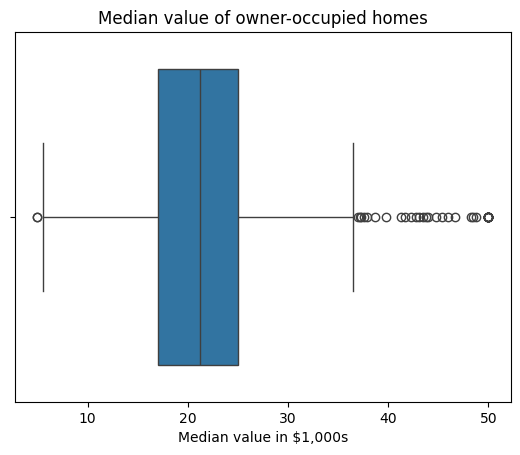

In [21]:
med_bp = sns.boxplot(x=boston_df['MEDV']).set_title("Median value of owner-occupied homes")
pyplot.xlabel('Median value in $1,000s')

Text(0, 0.5, 'Number of houses')

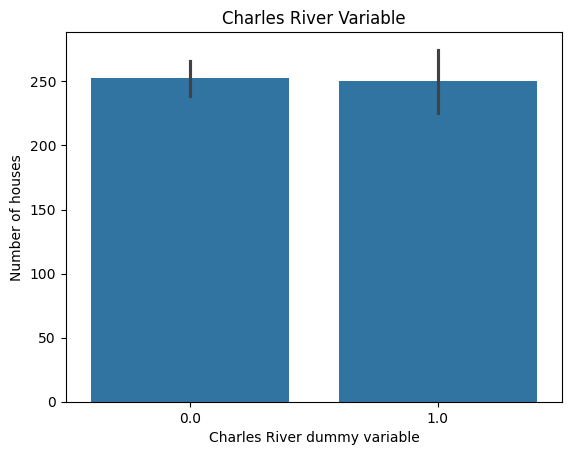

In [57]:
bp = sns.barplot(data=boston_df, x='CHAS', y ='Unnamed: 0')
bp.set_title("Charles River Variable")
bp.set_xlabel("Charles River dummy variable")

bp.set_ylabel("Number of houses")

In [27]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0, 0.5, 'Median value of owner-occupied homes in $1000s')

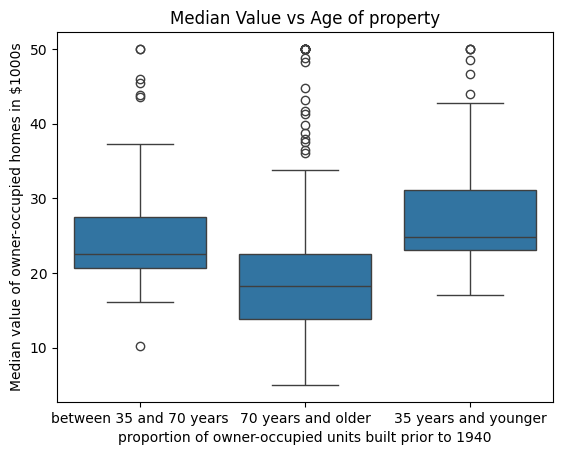

In [31]:
sns.boxplot(data=boston_df, x="age_group", y="MEDV").set_title('Median Value vs Age of property')
pyplot.xlabel("proportion of owner-occupied units built prior to 1940")
pyplot.ylabel("Median value of owner-occupied homes in $1000s")

Text(0, 0.5, 'proportion of not-retail business acres per town')

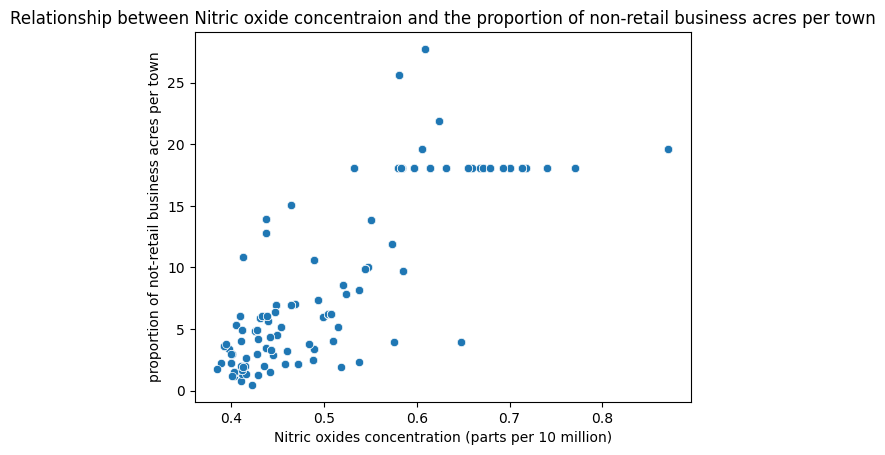

In [52]:
sp = sns.scatterplot(data=boston_df, x="NOX",y="INDUS")
sp.set_title("Relationship between Nitric oxide concentraion and the proportion of non-retail business acres per town")
sp.set_xlabel("Nitric oxides concentration (parts per 10 million)")
sp.set_ylabel("proportion of not-retail business acres per town")

Text(0.5, 1.0, 'Pupil to teacher ratio')

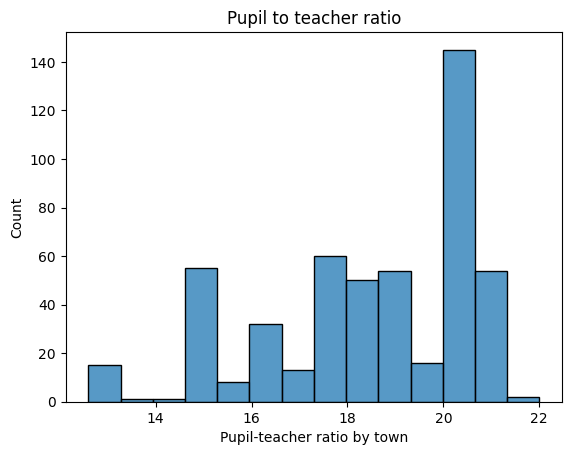

In [60]:
hg = sns.histplot(data=boston_df, x="PTRATIO")
hg.set_xlabel("Pupil-teacher ratio by town")
hg.set_title("Pupil to teacher ratio")

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median house values that are bound by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median house values that are bound by the charles river")

α = 0.05

In [58]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [59]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion:** The p-value is less than the alpha value of 0.05 we reject the null hypothesis

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis:

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median house values for each proportion of owner occupied units built prior to 1940")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median house values for each proportion of owner occupied units built prior to 1940")

α = 0.05

In [61]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [63]:
thirtyfive_lower = boston_df[boston_df['age_group'] =='35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistics, p_value = scipy.stats.f_oneway(thirtyfive_lower,thirtyfive_seventy,seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistics,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** The p-value is less than the alpha value of 0.05 we reject the null hypothesis

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0: µ\_1 = µ\_2$ there is no difference in Nitric oxide concentrations and the proportion of non-retail business acres per town
*   $H\_1: µ\_1 ≠ µ\_2$ there is a difference in Nitric oxide concentrations and the proportion of non-retail business acres per town.

α = 0.05

In [65]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** The p-value is less than the alpha value of 0.05 we reject the null hypothesis

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

*   $H\_0: µ\_1 = µ\_2$ there is no difference in the impact of additional weighted distance to the five boston employemnt centres on the median value of owner occuplied homes.
*   $H\_1: µ\_1 ≠ µ\_2$ there is a difference in the impact of additional weighted distance to the five boston employemnt centres on the median value of owner occuplied homes.

α = 0.05

In [67]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        10:22:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value is less than the alpha value of 0.05 we reject the null hypothesis